In [ ]:
import cv2
import numpy as np

# Charger les deux images
img1 = cv2.imread('20230323_191223_BRS_L_UP_11.369_00 (copie).jpg', 0)  # Charger en niveaux de gris
img2 = cv2.imread('20230406_060421_BRS_L_UP_11.369_00.jpg', 0)

# Initialiser le détecteur de keypoints et descripteurs (SIFT dans cet exemple)
sift = cv2.SIFT_create()

# Trouver les keypoints et descripteurs pour les deux images
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Utiliser un algorithme de correspondance (Brute-Force dans cet exemple) pour trouver les bonnes correspondances
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Appliquer le ratio test pour obtenir de bonnes correspondances
good_matches = []
for m, n in matches:
    if m.distance < 0.85 * n.distance:
        good_matches.append(m)

# Extraire les points correspondants des deux images
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Trouver la transformation perspective (homographie) entre les points correspondants
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Appliquer la transformation à img1 pour l'aligner avec img2
aligned_img = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

# Afficher les images originales et alignées côte à côte pour vérification
result = np.concatenate((img2, aligned_img), axis=1)
cv2.imshow('Aligned Images', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to target thread (0x564888286e90)

QObject::moveToThread: Current thread (0x564888286e90) is not the object's thread (0x564888edc960).
Cannot move to tar

In [1]:
import cv2
import numpy as np

# Charger les deux images
img1 = cv2.imread('20230323_191223_BRS_L_UP_11.369_00 (copie).jpg', 0)  # Charger en niveaux de gris
img2 = cv2.imread('20230406_060421_BRS_L_UP_11.369_00.jpg', 0)

# Initialiser le détecteur de keypoints et descripteurs (SIFT dans cet exemple)
sift = cv2.SIFT_create()

# Trouver les keypoints et descripteurs pour les deux images
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Utiliser un algorithme de correspondance (Brute-Force dans cet exemple) pour trouver les bonnes correspondances
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Appliquer le ratio test pour obtenir de bonnes correspondances
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:  # Ajuster le seuil pour plus de correspondances
        good_matches.append(m)

# Extraire les points correspondants des deux images
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Si le nombre de correspondances est suffisant (au moins 4), calculer l'homographie et aligner les images
if len(good_matches) >= 4:
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    aligned_img = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
    
    # Afficher les images originales et alignées côte à côte pour vérification
    result = np.concatenate((img2, aligned_img), axis=1)
    cv2.imshow('Aligned Images', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Nombre insuffisant de correspondances pour calculer l'homographie.")


Nombre insuffisant de correspondances pour calculer l'homographie.


NameError: name 'clahe_image' is not defined

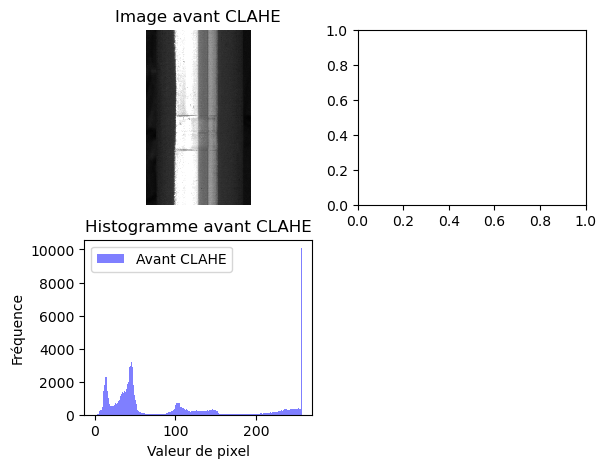

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('20230406_060421_BRS_L_UP_11.369_00.jpg')
image_2 = cv2.imread('20230323_191223_BRS_L_UP_11.369_00.jpg')

# Convertir l'image en YUV
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(image_yuv)

# Appliquer CLAHE sur le canal Y (luminance)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
y_clahe = clahe.apply(y)

# Afficher l'histogramme avant et après CLAHE pour le canal Y
plt.figure(figsize=(10, 5))

# Afficher l'image avant CLAHE
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray',interpolation='nearest')
plt.title('Image avant CLAHE')
plt.axis('off')

# Histogramme avant CLAHE
plt.subplot(2, 3, 4)
plt.hist(y.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Avant CLAHE')
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')
plt.title('Histogramme avant CLAHE')
plt.legend()

# Afficher l'image après CLAHE
plt.subplot(2, 3, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Image après CLAHE')
plt.axis('off')

# Histogramme après CLAHE
plt.subplot(2, 3, 5)
plt.hist(y_clahe.flatten(), bins=256, range=(0, 256), color='orange', alpha=0.5, label='Après CLAHE')
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')
plt.title('Histogramme après CLAHE')
plt.legend()

# Afficher l'autre image
plt.subplot(2, 3, 3)
plt.imshow(image_2, cmap='gray')
plt.title('Autre image')
plt.axis('off')

# Spécifier la taille de la figure
plt.gcf().set_size_inches(10, 8)
plt.tight_layout()
plt.show()

Pour la prochaine fois : 
- Essayer de faire le meme process avec l'autre image en augmentant la luminosité. 
- Faire un algorithme qui choisit l'image à traiter en fonction de la luminosité.

TypeError: Image data of dtype object cannot be converted to float

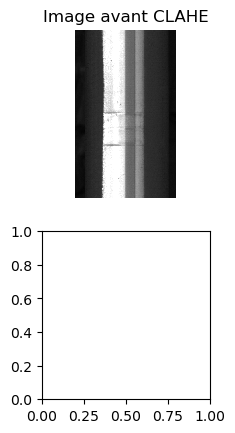

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger les deux images
image1 = cv2.imread('20230406_060421_BRS_L_UP_11.369_00.jpg')
image2 = cv2.imread('20230323_191223_BRS_L_UP_11.369_00.jpg')

# Convertir les images en niveaux de gris pour simplifier les calculs
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculer la luminance moyenne de chaque image
mean_luminance1 = gray_image1.mean()
mean_luminance2 = gray_image2.mean()

# Comparer les luminances et ajuster l'image la plus lumineuse si besoin
if mean_luminance2 > mean_luminance1:
    
    # Convertir l'image en YUV
    image_yuv = cv2.cvtColor(image1, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(image_yuv)

    # Appliquer CLAHE sur le canal Y (luminance)
    clahe_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_clahe = clahe.apply(y)
    
    # Afficher l'image avant CLAHE
    plt.subplot(2, 1, 1)
    plt.imshow(image1, cmap='gray',interpolation='nearest')
    plt.title('Image avant CLAHE')
    plt.axis('off')
    
    # Afficher l'image après CLAHE
    plt.subplot(2, 1, 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('Image après CLAHE')
    plt.axis('off')

else:
    print("L'image 2 n'est pas plus lumineuse que l'image 1.")
    # Convertir l'image en YUV
    image_yuv = cv2.cvtColor(image2, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(image_yuv)

    # Appliquer CLAHE sur le canal Y (luminance)
    clahe_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_clahe = clahe.apply(y)
    
    # Afficher l'image avant CLAHE
    plt.subplot(2, 1, 1)
    plt.imshow(image2, cmap='gray',interpolation='nearest')
    plt.title('Image avant CLAHE')
    plt.axis('off')
    
    # Afficher l'image après CLAHE
    plt.subplot(2, 1, 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('Image après CLAHE')
    plt.axis('off')


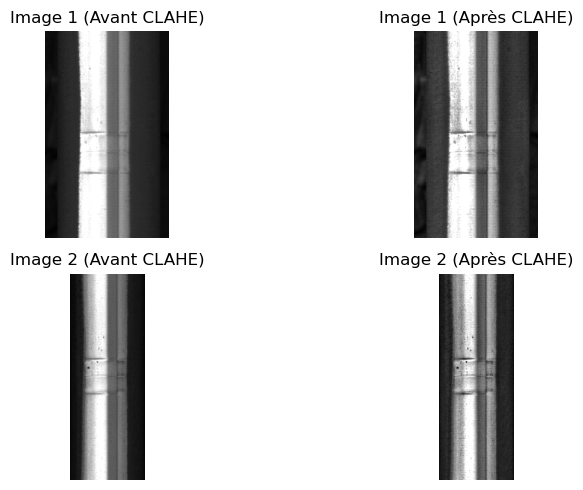

In [9]:
import cv2
import matplotlib.pyplot as plt

# Charger les images
image1 = cv2.imread('20230406_060421_BRS_L_UP_11.369_00.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('20230323_191223_BRS_L_UP_11.369_00.jpg', cv2.IMREAD_GRAYSCALE)

# Créer un objet CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Appliquer CLAHE aux images pour ajuster la luminosité
image1_clahe = clahe.apply(image1)
image2_clahe = clahe.apply(image2)

# Afficher les images originales et celles avec CLAHE
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1 (Avant CLAHE)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image1_clahe, cmap='gray')
plt.title('Image 1 (Après CLAHE)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')
plt.title('Image 2 (Avant CLAHE)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image2_clahe, cmap='gray')
plt.title('Image 2 (Après CLAHE)')
plt.axis('off')

plt.tight_layout()
plt.show()
